# Matplotlib 进阶
## 第四章 - Matplot 3D
    4.0 创建Matplot 3D
    4.1 Gamma函数
    4.2 线框图(wide frame)
    4.3 曲面图 (surface)
    4.4 调整视角
    4.5 条形图 (bar)

- 参考：
- 本文参考 公众号:王的机器 https://mp.weixin.qq.com/s?__biz=MzIzMjY0MjE1MA==&mid=2247499018&idx=1&sn=e72b50ef9d1d0f196011468480c1e01d&chksm=e8937e03dfe4f7150158eefe0c21c1f7496e4fc48f398a3ff89b8e1d2c627e97337ccfcf6d3f&scene=178&cur_album_id=1352817590674194433#rd

### 4.0 创建Matplot 3D

- Matplotlib 最初在设计时仅考虑了二维绘图。但在其 1.0 版本后，一些构建在二维绘图基础上的三维绘图也可以使用了。
- 要画三维(立体) 图，首先导入 mplot3d 工具包。
- 一旦 mplot3d 工具包被导入，创建立体图有两种方式：
  - 用 fig = plt.figure()和 ax = mplot3d.Axes3D(fig)
  - 用 fig = plt.figure()和 ax = plt.axes(projection='3d')

- 第二种方式更简单些。如果要同时生成图和坐标系，还可用以下语句：
  - fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})

- 三种生成立体图的方式是等价的，生成的图如下所示。

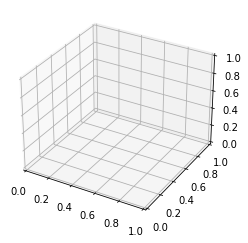

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from mpl_toolkits import mplot3d
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})


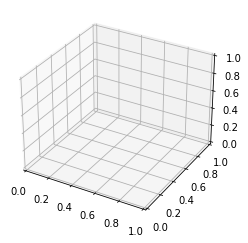

In [2]:
fig = plt.figure()
ax = plt.axes(projection='3d')

### 本章只介绍三种类型的3D 图，它们是最常用的，分别是
- 线框图(wide frame)
- 曲面图 (surface)
- 条形图 (bar)


### 4.1 Gamma函数
- 不想看(看不懂） 伽玛分布 的可以快进到后面画图部分。
- Γ(x) 函数可以看成是阶乘在实数集上的延拓
- python 对于 Gamma函数 在scipy 和numpy 里面都有支持。

- 伽玛函数参考 https://baike.baidu.com/item/%E4%BC%BD%E7%8E%9B%E5%87%BD%E6%95%B0/3540177?fr=aladdin
- 伽玛分布 与 二项式分布 与 Possion 分布 https://blog.csdn.net/lanchunhui/article/details/50535735

### 4.2 线框图(wide frame)
- 画线框图和曲面图数据都使用一个比较‘硬核’的数据：伽玛函数（Gamma函数）在复平面的求值。


In [3]:
import scipy.special as S
#Γ(x) 函数可以看成是阶乘在实数集上的延拓
print(S.gamma(5))
print(S.gamma(6))
print(S.gamma(5.5))
print(S.gamma(-2.2))

print(S.gamma(1+1j)) # gamma函数支持复数)


24.0
120.0
52.34277778455352
-2.2049805184191333
(0.4980156681183547-0.1549498283018101j)


[ 0.27008821  0.27161376  0.27318998 ... 51.67280382 52.00662895
 52.34277778]


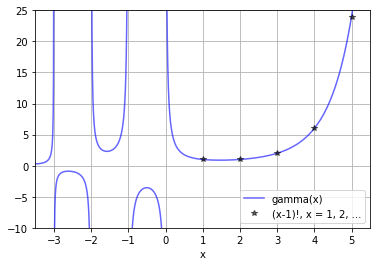

In [4]:
#产生一个实数数据集
#Plot gamma(x) for real x
x = np.linspace(-3.5, 5.5, 2251)
y = S.gamma(x)
print(y)
plt.plot(x, y, 'b', alpha=0.6, label='gamma(x)')
k = np.arange(1, 7)

#S.factorial 是阶乘 n!函数
plt.plot(k, S.factorial(k-1), 'k*', alpha=0.6, label='(x-1)!, x = 1, 2, ...')
plt.xlim(-3.5, 5.5)
plt.ylim(-10, 25)
plt.grid()
plt.xlabel('x')
plt.legend(loc='lower right')
plt.show()
#图中可以看出 Gamma函数 是 阶乘的推展。

In [5]:
n = 200
x = np.linspace(-3.5 , 5.5, n)
y = np.linspace(-5 , 5, n)

z = np.array([], dtype= np.float64)
#z = []
for i in y:
    line = np.array(abs(S.gamma(x + i * 1j)), dtype = np.float64 ).flatten()
#    print(line)
#    print(type(line))
    z = np.append(z,line,axis=0)
    
#下面两种方法都可以求得长度
dim_x = len(x)
(dim_y,) = y.shape
print(dim_x,dim_y)

#现在z 是一维数组，将其转为2d
#z = z.flatten()
print(type(z))
#z = z.values()
z = z.reshape(dim_x,dim_y)
print(z.shape)

np.save('gamma',z)    #numpy 会自动加上.npy后缀


200 200
<class 'numpy.ndarray'>
(200, 200)


In [6]:
#不想看gamma 函数的直接快进到这里。
z = np.load('gamma.npy')    #numpy 会自动加上.npy后缀

data  = z
(m,n) = data.shape
#x, y =
X, Y = np.meshgrid(x,y)

print(X,Y)

[[-3.5        -3.45477387 -3.40954774 ...  5.40954774  5.45477387
   5.5       ]
 [-3.5        -3.45477387 -3.40954774 ...  5.40954774  5.45477387
   5.5       ]
 [-3.5        -3.45477387 -3.40954774 ...  5.40954774  5.45477387
   5.5       ]
 ...
 [-3.5        -3.45477387 -3.40954774 ...  5.40954774  5.45477387
   5.5       ]
 [-3.5        -3.45477387 -3.40954774 ...  5.40954774  5.45477387
   5.5       ]
 [-3.5        -3.45477387 -3.40954774 ...  5.40954774  5.45477387
   5.5       ]] [[-5.         -5.         -5.         ... -5.         -5.
  -5.        ]
 [-4.94974874 -4.94974874 -4.94974874 ... -4.94974874 -4.94974874
  -4.94974874]
 [-4.89949749 -4.89949749 -4.89949749 ... -4.89949749 -4.89949749
  -4.89949749]
 ...
 [ 4.89949749  4.89949749  4.89949749 ...  4.89949749  4.89949749
   4.89949749]
 [ 4.94974874  4.94974874  4.94974874 ...  4.94974874  4.94974874
   4.94974874]
 [ 5.          5.          5.         ...  5.          5.
   5.        ]]


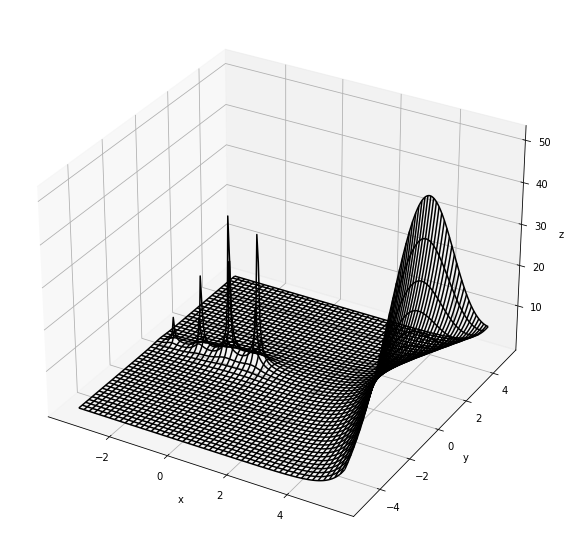

In [7]:
fig = plt.figure(figsize= (10,10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X= X, Y=Y, Z=data, color = 'black')
#ax.set(xticks= x, yticks=y, xticklabels = x, yticklabels = y )
#ax.set(xticks= x, yticks=y)

ax.set(xlabel= 'x', ylabel= 'y', zlabel = 'z' )
plt.show()


### 4.3 曲面图 (surface)
- 曲面图类似于线框图，把线框包围的多边形填充成面。用 plot_surface() 函数来实现，
- 代码和上面几乎一样，参数 color 和 edgecolor 分别控制面和边的颜色。

- 还可设定参数 cmap 填充渐变色，并在图旁附上颜色条。


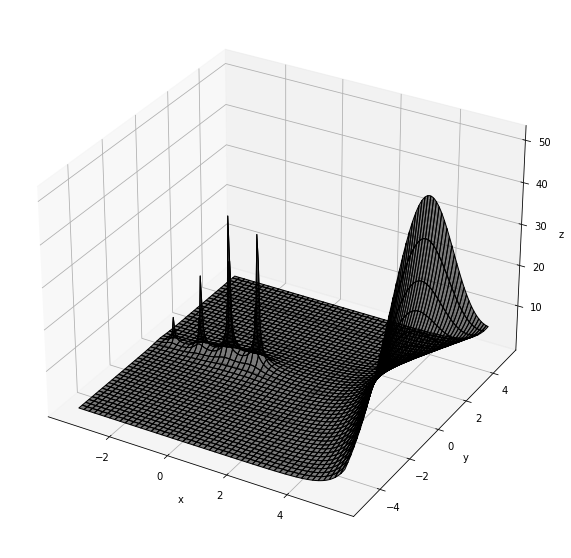

In [8]:
fig = plt.figure(figsize= (10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X= X, Y=Y, Z=data, color = 'black', edgecolor = 'black', alpha= 0.5)
#ax.set(xticks= x, yticks=y, xticklabels = x, yticklabels = y )
#ax.set(xticks= x, yticks=y)

ax.set(xlabel= 'x', ylabel= 'y', zlabel = 'z' )
plt.show()

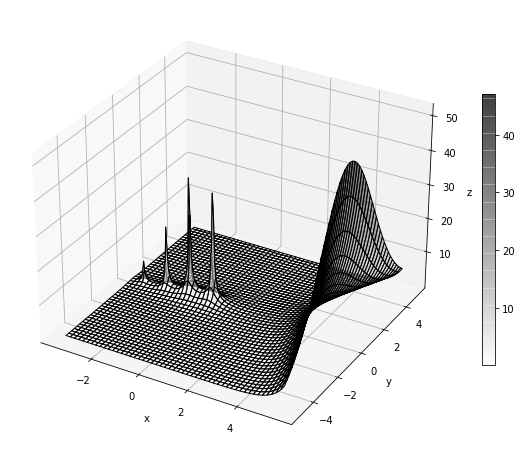

In [9]:
#这里加上渐变填充 cmap
fig = plt.figure(figsize= (10,10))
ax = plt.axes(projection='3d')
surf  = ax.plot_surface(X= X, Y=Y, Z=data, cmap = 'binary', edgecolor = 'black', alpha= 0.5)

fig.colorbar(surf, shrink = 0.5)

ax.set(xlabel= 'x', ylabel= 'y', zlabel = 'z' )
plt.show()

### 4.4 调整视角
- 虽然上图的视角不错，但有时默认的视角不是最好的，
- 我们可以通过 view_init(elev, azim) 函数可以调整角度，
- 其中参数 elev 值是水平面 (z = 0) 的仰角度 (elevation angle)，
- 参数 azim 值是 (x, y) 坐标系的方位角度 (azimuth angle)。
- 下面我们调整下视角再看看。

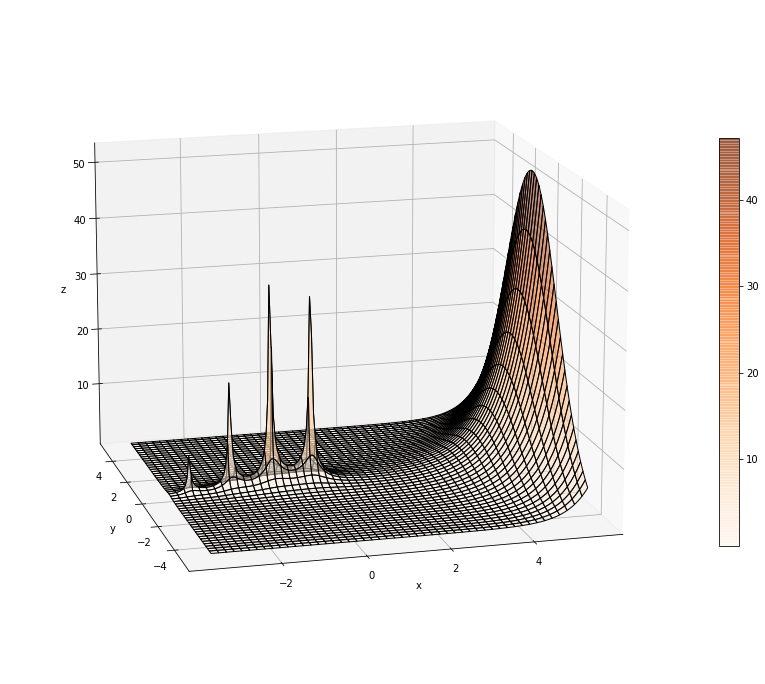

In [10]:
#调整视角。
fig = plt.figure(figsize= (15,15))
ax = plt.axes(projection='3d')

#调整视角。
ax.view_init(15,-105)

surf  = ax.plot_surface(X= X, Y=Y, Z=data, cmap = 'Oranges', edgecolor = 'black', alpha= 0.5)

fig.colorbar(surf, shrink = 0.5)

ax.set(xlabel= 'x', ylabel= 'y', zlabel = 'z' )
plt.show()

### 4.5 条形图 (bar)
- 3D 条形图和 2D 条形图相比，扩展了比较信息的能力。下面代码比较二项分布和泊松分布的概率质量函数 (PMF)。
- 条形图中的每个条需要两个参数：位置和大小，对应着下面代码中的 (x, y, z) 和 (dx, dy, dz)。
- 位置是在立体图中的坐标，x 和 z 都好理解，由于在 y 轴上画两个分布，因此有两个 y 值
- 大小指的条形的长宽高，长 dx 和宽 dy 分别是 0.5 和 0.2，而高 dz 就是 PMF 值

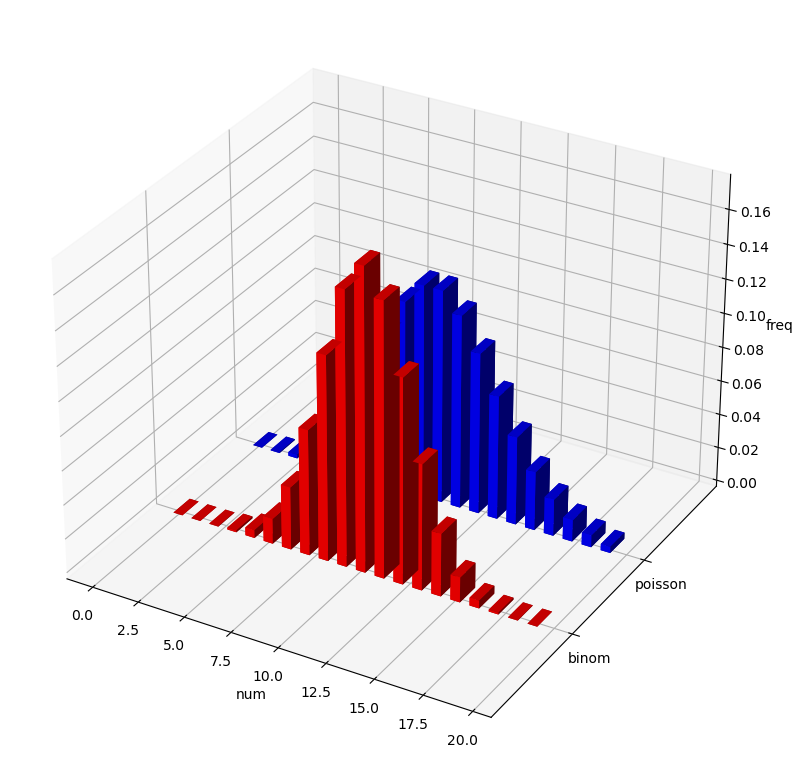

In [11]:
import scipy.stats as st

#二项式分布参数 和 泊松分布 参数
p, M = 0.5, 20
lbd = p*M

#创建一系列array
x, z, dx, dy = list(range(M)), [0]*M, [0.5]*M, [0.2]*M

fig = plt.figure(figsize= (10,10), dpi= 100)
ax = plt.axes(projection='3d')

#调整视角。
#ax.view_init(15,-105)

y = [0.9]*M
dz = st.binom.pmf(x, M, p)
ax.bar3d(x, y, z, dx, dy, dz, color = 'red')

y = [1.9]*M
dz = st.poisson.pmf(x, lbd)
ax.bar3d(x, y, z, dx, dy, dz, color = 'blue')

ax.set(ylim =[0,3], yticks =[1,2], yticklabels = ['binom', 'poisson'])
ax.set(xlabel= 'num', zlabel = 'freq' )
plt.show()

- 当 M 为 20，p 为 0.5，λ 为 M 和 p 的乘积等于 10 时，二项分布和泊松分布的差别挺大的。
- 将 M 改成 100，p 改成 0.1 后，同样将 λ 设为 M 和 p 的乘积，再运行上面代码生成下图，
- 发现二项分布和泊松分布的图几乎是一样的。这时因为当 M 值越大和 p 值越小的时候，两个分布越来越近似。

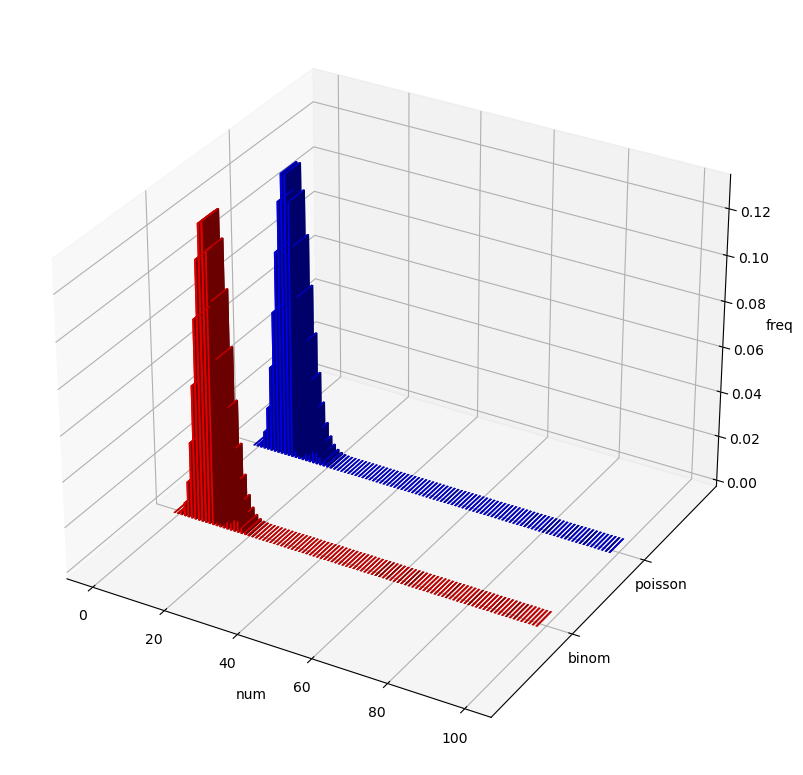

In [12]:
import scipy.stats as st

#二项式分布参数 和 泊松分布 参数
p, M = 0.1, 100
lbd = p*M

#创建一系列array
x, z, dx, dy = list(range(M)), [0]*M, [0.5]*M, [0.2]*M

fig = plt.figure(figsize= (10,10), dpi= 100)
ax = plt.axes(projection='3d')

#调整视角。
#ax.view_init(15,-105)

y = [0.9]*M
dz = st.binom.pmf(x, M, p)
ax.bar3d(x, y, z, dx, dy, dz, color = 'red')

y = [1.9]*M
dz = st.poisson.pmf(x, lbd)
ax.bar3d(x, y, z, dx, dy, dz, color = 'blue')

ax.set(ylim =[0,3], yticks =[1,2], yticklabels = ['binom', 'poisson'])
ax.set(xlabel= 'num', zlabel = 'freq' )
plt.show()

In [13]:
#Your answer here